# Sampling in Python

Pengambilan sampel dengan Python adalah landasan statistik inferensi dan pengujian hipotesis. Ini merupakan keterampilan yang digunakan dalam analisis survei dan desain eksperimental untuk menarik kesimpulan tanpa mensurvei seluruh populasi.

In [1]:
# Importing pandas
import pandas as pd

# Importing Data
attrition = pd.read_feather("Data/attrition.feather")
spotify = pd.read_feather("Data/spotify_2000_2020.feather")
coffee = pd.read_feather("Data/coffee_ratings_full.feather")

## Introduction to Sampling
Pengenalan kepada sampling dan mempelajari permasalahan yang disebabkan oleh *convenience sampling* (Sampling Kebetulan) dan mempelajari perbedaan antara *true randomness* dan *pseudo-randomness*

### Sampling and point estimates

- **Sampling** adalah proses di mana porsi dari suatu populasi diseleksi agar dapat mewakilkan populasi tersebut.
- **Population** adalah seluruh bagian data yang lengkap
  - Tidak harus mengacu kepada orang
  - Biasanya, kita tidak tahu berapa jumlah pasti dari seluruh populasi
- **Sample** merupakan bagian kecil dari populasi yang dianggap dapat mewakilkan seluruh populasi

Sampling tidak disarankan dilakukan ketika populasi/data yang dimiliki berjumlah sedikit

#### Sampling sederhana dengan Pandas

In [2]:
# Sample 1000 baris dari data spotify
spotify_sample = spotify.sample(n=1000)

# Hitung rata - rata dari kolom 'duration_minutes' dari data spotify
mean_dur_pop = spotify["duration_minutes"].mean()

# Hitung rata - rata dari kolom 'duration_minutes' dari data spotify sample
mean_dur_samp = spotify_sample["duration_minutes"].mean()

# Print the means
print(f'Rata - rata durasi dari populasi : {mean_dur_pop}')
print(f'Rata - rata durasi dari sample   : {mean_dur_samp}')

Rata - rata durasi dari populasi : 3.8521519140900073
Rata - rata durasi dari sample   : 3.8773858166666666


Dapat terlihat bahwa nilai rata rata dari **sample** dan **populasi** terlihat mendekati namun tidak sama persis

#### Sampling sederhana dengan Numpy

In [3]:
#Import numpy
import numpy as np

# Buat series pandas dari kolom 'loudness' dari data populasi
loudness_pop = spotify['loudness']

# Sample 100 nilai dari loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Hitung rata - rata loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Hitung rata - rata loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

# Print the means
print(f'Rata - rata loudness dari populasi : {mean_loudness_pop}')
print(f'Rata - rata loudness dari sample   : {mean_loudness_samp}')

Rata - rata loudness dari populasi : -7.366856851353947
Rata - rata loudness dari sample   : -7.61588


Dapat terlihat lagi bahwa nilai rata rata dari **sample** dan **populasi** terlihat mendekati namun tidak sama persis

### Convenience Sampling

- Convenience Sampling adalah pengambilan sampel secara bebas 
- Teknik pengambilan sampel yang paling umum digunakan karena sangat cepat, tidak rumit, dan ekonomis.
- Namun teknik ini, rentan terhadap terjadinya *sample bias* atau sample tidak representatif terhadap populasi

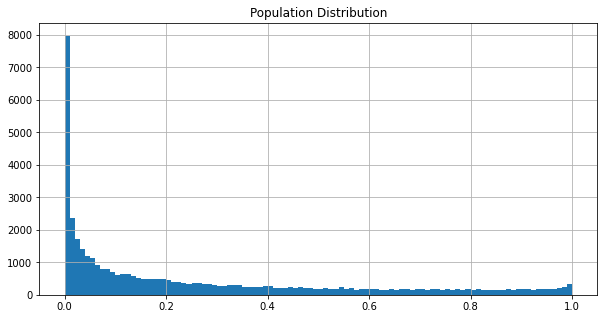

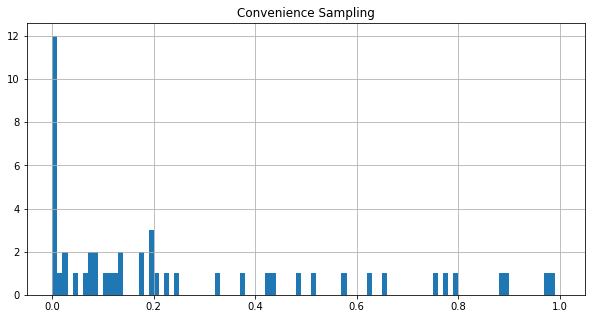

In [7]:
#Import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
spotify['acousticness'].hist(bins=np.arange(0,1.01,0.01))
plt.title("Population Distribution")
plt.show()


plt.figure(figsize=(10,5))
spotify_acousticness_sample = spotify.head(50)
spotify_acousticness_sample['acousticness'].hist(bins=np.arange(0,1.01,0.01))
plt.title("Convenience Sampling")
plt.show()

### Pseudo-random number generation

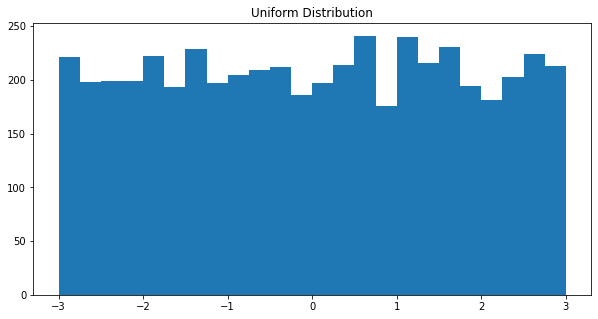

In [10]:
# Buat bilangan acak dengan distribusi uniform dengan bilangan paling kecil -3 dan paling besar 3
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Buat histogram dari nilai uniforms
plt.figure(figsize=(10,5))
plt.hist(uniforms, bins=np.arange(-3, 3.25, 0.25))
plt.title("Uniform Distribution")
plt.show()

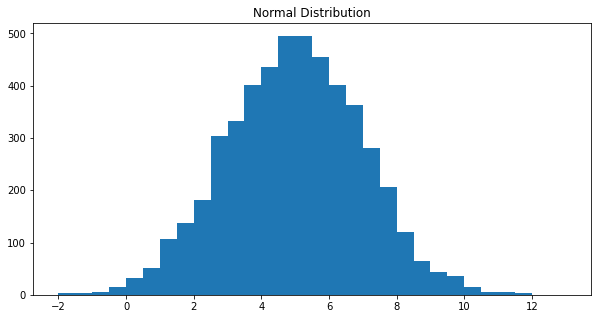

In [11]:
normals = np.random.normal(loc=5, scale=2, size=5000)

plt.figure(figsize=(10,5))
plt.hist(normals, bins=np.arange(-2, 13.5, 0.5))
plt.title("Normal Distribution")
plt.show()

#### Memahami Random Seed

Random seed berguna agar bilangan acak dapat dihasilkan kembali

In [14]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
print(f'X : {x}')

np.random.seed(456)
y = np.random.normal(size=5)
print(f'Y : {y}')

X : [-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]
Y : [-0.6681285  -0.49820952  0.61857582  0.56869225  1.35050948]


Seed yang berbeda akan menghasilkan bilangan acak yang berbeda juga

In [15]:
np.random.seed(123)
x = np.random.normal(size=5)
print(f'X : {x}')

np.random.seed(123)
y = np.random.normal(size=5)
print(f'Y : {y}')

X : [-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]
Y : [-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]


Ketika memakai nilai seed yang sama maka bilangan random akan sama